# Edge Detection using OpenCV

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

import requests
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-mQ3Cf17DbL__chA1GszL5IJzJMmUENhyRg&usqp=CAU"
r = requests.get(url)
with open('test.jpg', 'wb') as f:
    f.write(r.content) 

In [ ]:
img = cv2.imread('test.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img_gray,(3,3),0)

## Sobel Edge Detection

Нам необходимо найти быстрые изменения интенсивности пикселей.

Syntax: dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
Where, ddepth is the depth of the destination image, dx is Horizontal sobel derivative, dy is vertical sobel derivative and ksize is the kernel size.

(-0.5, 180.5, 278.5, -0.5)

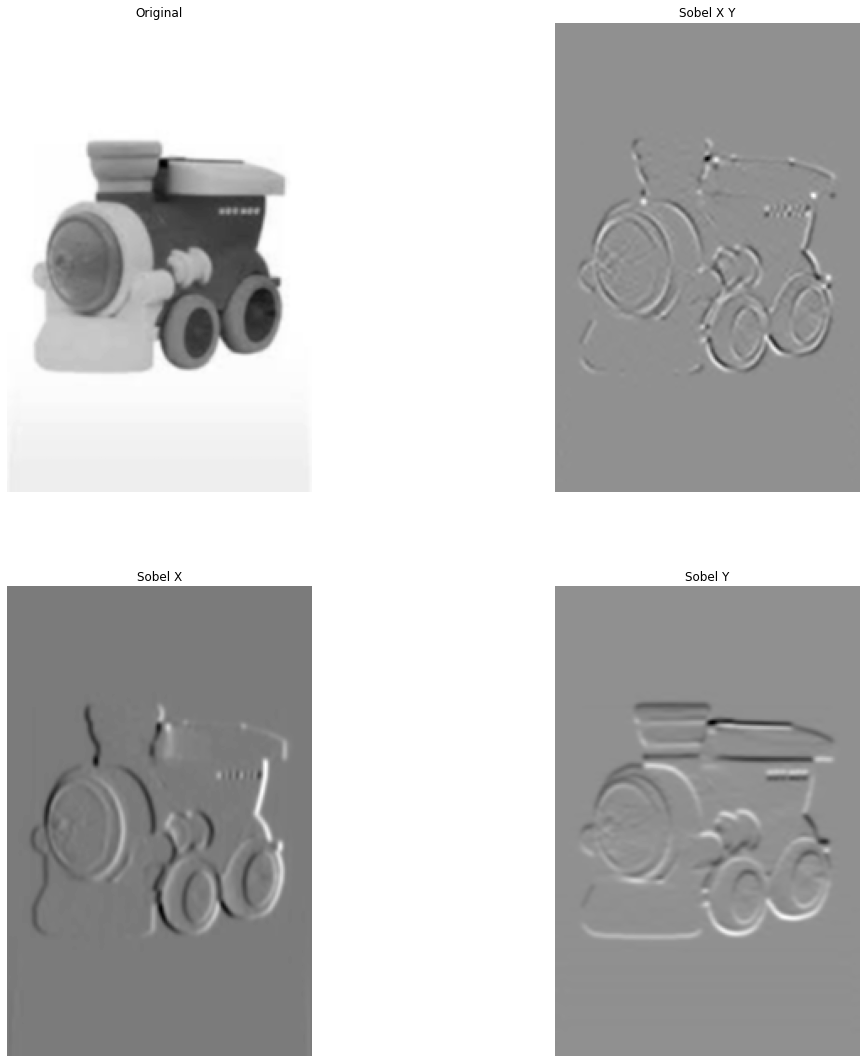

In [ ]:
sobelx = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 

sobely = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

plt.figure(figsize=(18,19))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original') 
plt.axis("off")

plt.subplot(222)
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel X Y') 
plt.axis("off")

plt.subplot(223)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X') 
plt.axis("off")

plt.subplot(224)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")

## Canny Edge Detection

**Сглаживание**. Размытие изображения для удаления шума. Оператор Кэнни использует фильтр, который может быть хорошо приближен к первой производной гауссианы.  

$\sigma  = 1.4$:

$\displaystyle \mathbf {B} = \frac{1}{159} \begin{bmatrix}2&4&5&4&2\\4&9&12&9&4\\5&12&15&12&5\\4&9&12&9&4\\2&4&5&4&2\end{bmatrix}*A$


**Поиск градиентов**. Границы отмечаются там, где градиент изображения приобретает максимальное значение. Они могут иметь различное направление, поэтому алгоритм Кэнни использует четыре фильтра для обнаружения горизонтальных, вертикальных и диагональных ребер в размытом изображении.

${\displaystyle \mathbf {G} ={\sqrt {{\mathbf {G} _{x}}^{2}+{\mathbf {G} _{y}}^{2}}}}$

${\displaystyle \mathbf {\Theta } =\operatorname {arctg} \left({\mathbf {G} _{y} \over \mathbf {G} _{x}}\right).}$

Угол направления вектора градиента округляется и может принимать такие значения: 0, 45, 90, 135.

**Подавление немаксимумов**. Только локальные максимумы отмечаются как границы.

**Двойная пороговая фильтрация**. Потенциальные границы определяются порогами.

Трассировка области неоднозначности. Итоговые границы определяются путём подавления всех краёв, не связанных с определенными (сильными) границами.

Перед применением детектора обычно преобразуют изображение в оттенки серого, чтобы уменьшить вычислительные затраты. Этот этап характерен для многих методов обработки изображений.

Syntax: dest = cv2.canny(src, threshold1, threshold2)
Where, threshold1 is the the High threshold value of intensity gradient and threshold2 is the low threshold value of the intensity gradient.

Items count:  17


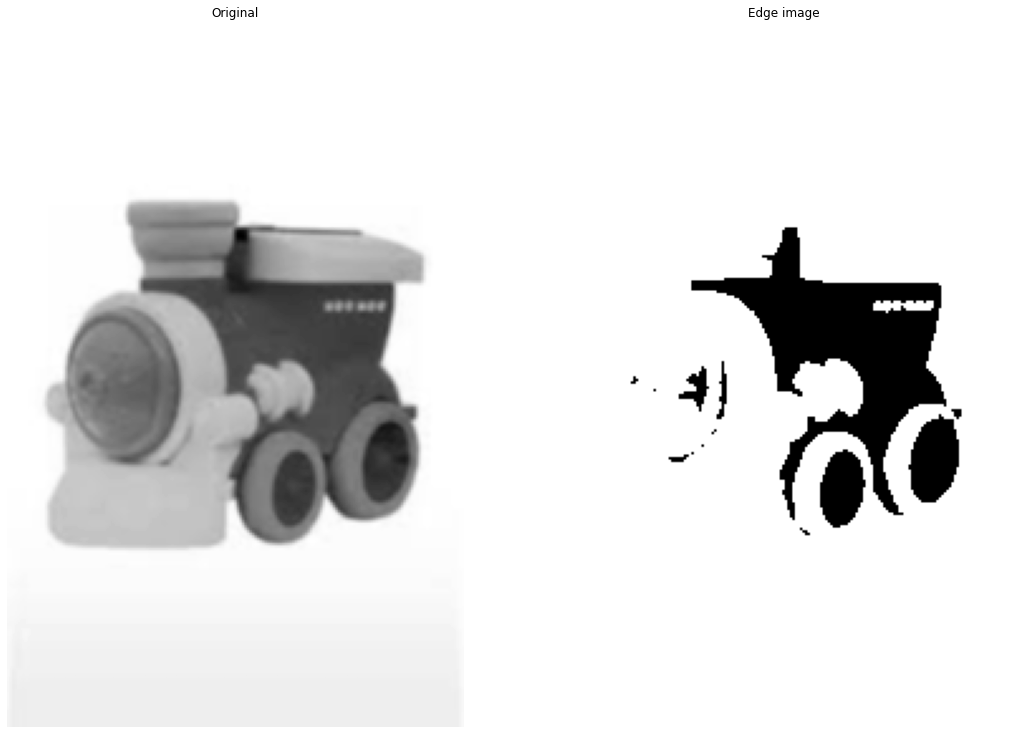

In [ ]:
edges = cv2.Canny(image=img, threshold1=100, threshold2=200)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original') 
plt.axis("off")

ret, thresh = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
number_of_objects_in_image= len(contours)

plt.subplot(122)
plt.imshow(thresh, cmap='gray')
plt.title('Edge image')
plt.axis("off")

print('Items count: ',number_of_objects_in_image)

**Задача**

Посчитайте количество объектов на картинке выше.